In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import xgboost
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('whitegrid')

# Keras 
import tensorflow as tf
from tensorflow.keras import layers, models, preprocessing

from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from xgboost import XGBRegressor

# Code

In [ ]:
data = pd.read_csv("https://github.com/JesalMP/CSE4020ML/blob/main/cse3505/proj/voiceDataSet.csv?raw=true")
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [ ]:
data.groupby("label").count()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
label,,,,,,,,,,,,,,,,,,,,
female,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584
male,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584


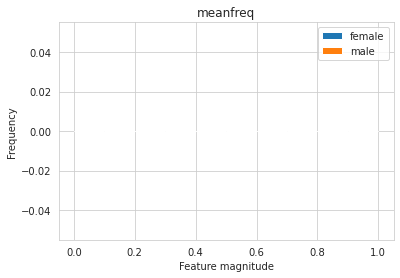

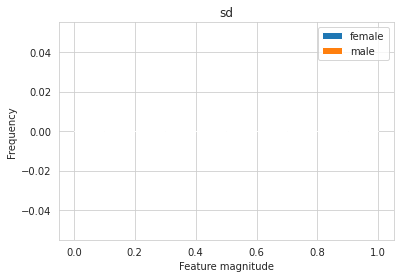

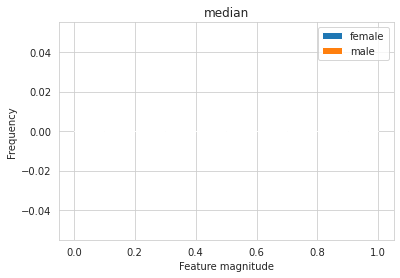

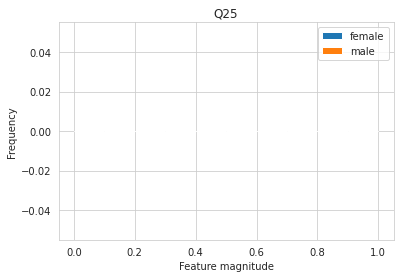

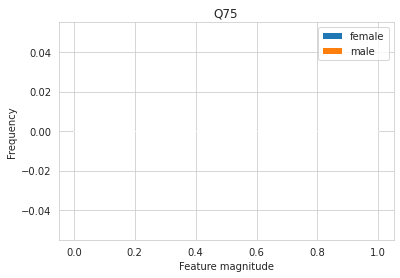

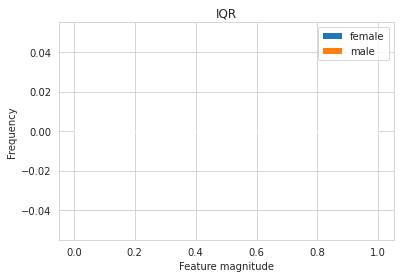

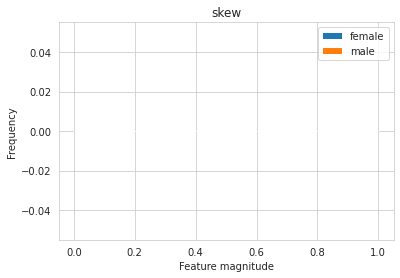

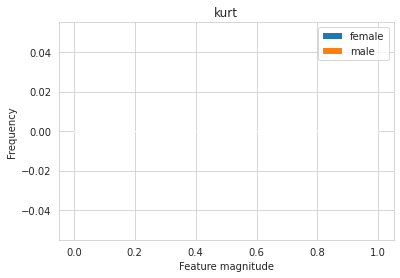

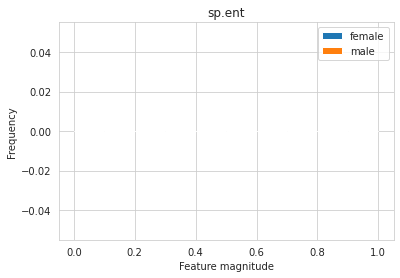

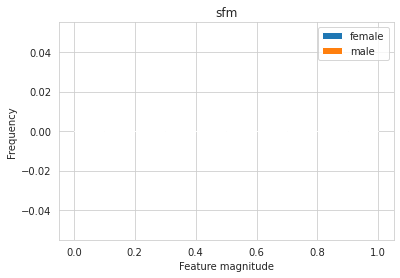

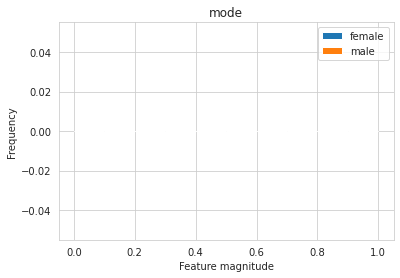

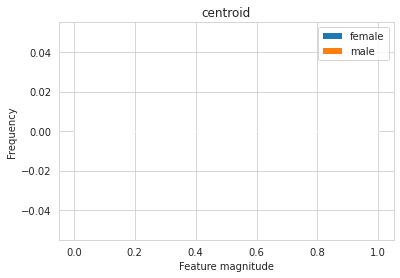

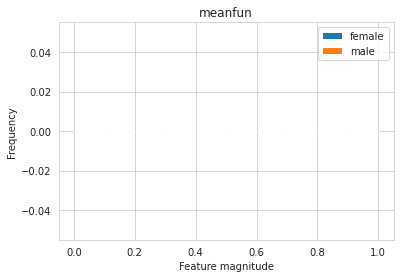

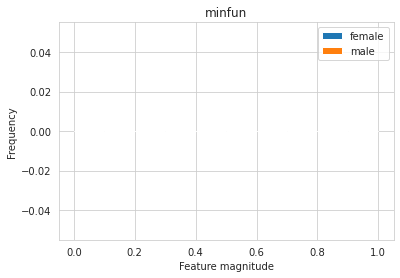

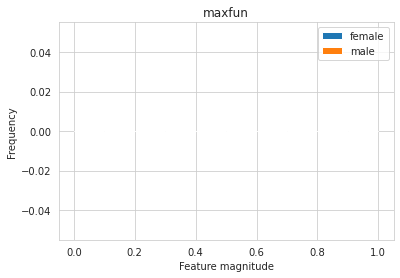

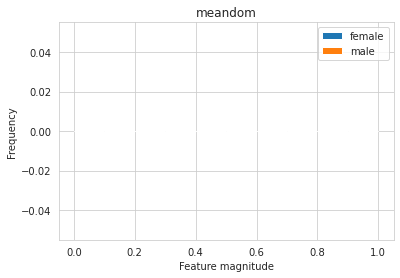

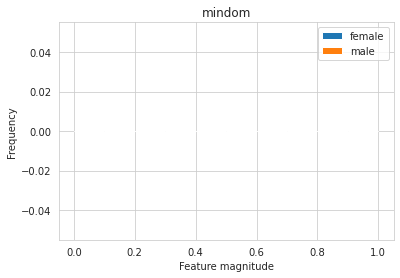

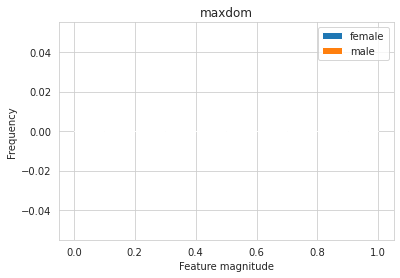

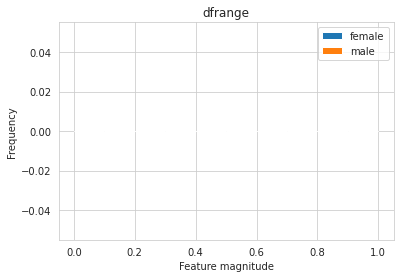

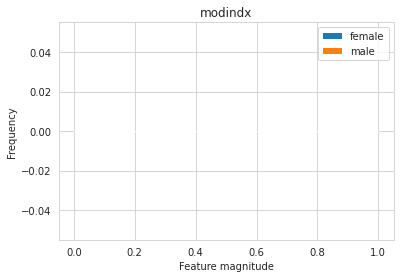

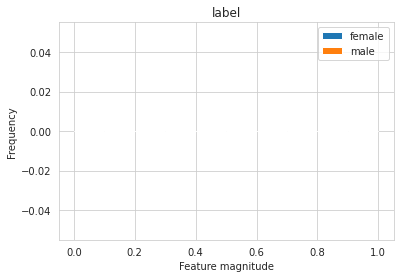

In [ ]:
for col in data.columns:
    plt.hist(data.loc[data['label'] == 0, col],label ="female")
    plt.hist(data.loc[data['label'] == 1, col],label="male")
    plt.title(col)
    plt.xlabel("Feature magnitude")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()

In [ ]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(data['label']))}
class_mapping

{'female': 0, 'male': 1}

In [ ]:
data['label'] = data['label'].map(class_mapping)

In [ ]:
X, y = data.iloc[:, :-1].values, data.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [ ]:
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0


In [ ]:
#logistic regression
logit = LogisticRegression()
logit.fit(X_train_std, y_train)

print("Logistic Regression")
print("Accuracy on training set: {:.3f}".format(logit.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(logit.score(X_test_std, y_test)))

y_pred_logit = logit.predict(X_test_std)
print("Predicted value: ",y_pred_logit)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_logit, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

Logistic Regression
Accuracy on training set: 0.978
Accuracy on test set: 0.965
Predicted value:  [1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0
 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1
 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1
 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0
 1

In [ ]:
X_test_std[1]

array([ 0.03946543,  0.18230134,  0.14965979, -0.22352065,  0.33874459,
        0.44652428, -0.50729126, -0.24307246,  0.94135018,  0.31665511,
        1.20910225,  0.03946543, -0.84371881,  0.63124093,  0.56830812,
       -0.33243816, -0.46124948, -0.73585392, -0.72780832, -0.17748402])

In [ ]:
#descision tree
tree = DecisionTreeClassifier(random_state=0,max_depth=4)
tree.fit(X_train_std, y_train)

print("Decision Tree")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test_std, y_test)))

y_pred_tree = tree.predict(X_test_std)
print("Predicted value: ",y_pred_tree)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_tree, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

Decision Tree
Accuracy on training set: 0.983
Accuracy on test set: 0.961
Predicted value:  [1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0
 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0
 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1
 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1
 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0
 1 0 0 1

In [ ]:
#random forest
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(X_train_std, y_train)

print("Random Forest")
print("Accuracy on training set: {:.3f}".format(forest.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test_std, y_test)))

y_pred_forest = forest.predict(X_test_std)
print("Predicted value: ",y_pred_forest)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_forest, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

Random Forest
Accuracy on training set: 1.000
Accuracy on test set: 0.965
Predicted value:  [1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0
 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1
 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1
 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0
 1 0 0 1

In [ ]:
#support vector machine
svm = SVC()
svm.fit(X_train_std, y_train)

print("Support Vector Machine")
print("Accuracy on training set: {:.3f}".format(svm.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test_std, y_test)))

y_pred_sm = svm.predict(X_test_std)
print("Predicted value: ",y_pred_sm)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_sm, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

Support Vector Machine
Accuracy on training set: 0.989
Accuracy on test set: 0.974
Predicted value:  [1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0
 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1
 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1
 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0

In [ ]:
#xgboost
xgboost = XGBClassifier()
xgboost.fit(X_train_std, y_train)

print("XGBoost Regression")
print("Accuracy on training set: {:.3f}".format(xgboost.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(xgboost.score(X_test_std, y_test)))

y_pred_sm = svm.predict(X_test_std)
print("Predicted value: ",y_pred_sm)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_sm, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

XGBoost Regression
Accuracy on training set: 0.995
Accuracy on test set: 0.967
Predicted value:  [1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0
 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1
 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1
 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0
 1 

In [ ]:
def plot_feature_importances_mydata(model):
    n_features = X_train_std.shape[1]
    plt.figure(figsize=(8,6))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), list(data))
    plt.title("Feature Selection")
    plt.xlabel("Variable importance")
    plt.ylabel("Independent Variables")
    plt.show()

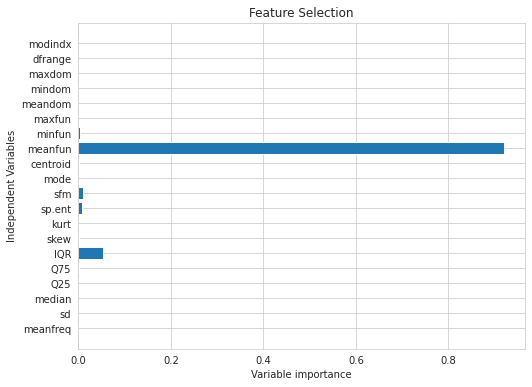

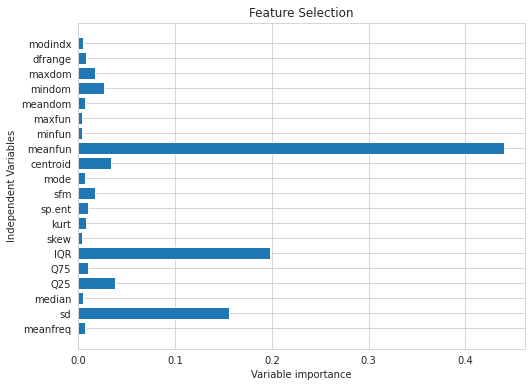

In [ ]:
plot_feature_importances_mydata(tree)
plot_feature_importances_mydata(forest)

In [ ]:
F=[[0.1927008,0.0774141, 0.2212, 0.1414, 0.2576, 0.1162, 1.96339, 7.004868, 0.9312536, 0.624493, 0.2653, 0.1927008, 0.1412526, 0.04569948, 0.2791139, 1.350794, 0.3660645, 5.857031, 5.490967,0.1258312]]

In [ ]:
F=[[0.24161970762661,0.0232200873851352,0.242162162162162,0.23027027027027,0.254594594594595,0.0243243243243243,2.40128126422944,8.07291926773437,0.766281996214164,0.071562391434083,0.247027027027027,0.24161970762661,0.181638810617641,0.0469148936170213,0.275625,0.58893310546875,0.21533203125,2.131787109375,1.916455078125,0.159077468953282]]

In [ ]:
F=[[0.174207144160245,0.0709799645093892,0.165342706502636,0.124171060339777,0.246045694200351,0.121874633860574,2.04174256243471,9.44736399492637,0.955387265024798,0.637912781033537,0.130404217926186,0.174207144160245,0.115822777085582,0.0439243027888446,0.273913043478261,1.34237570160801,0,7.70888671875,7.70888671875,0.0826017557861133]]

In [ ]:
F=[[0.03946543,  0.18230134,  0.14965979, -0.22352065,  0.33874459,
        0.44652428, -0.50729126, -0.24307246,  0.94135018,  0.31665511,
        1.20910225,  0.03946543, -0.84371881,  0.63124093,  0.56830812,
       -0.33243816, -0.46124948, -0.73585392, -0.72780832, -0.17748402]]

In [ ]:
F=[[0.230940727491969,0.0271521012673867,0.230339622641509,0.217660377358491,0.247245283018868,0.0295849056603774,2.40035946984576,8.95644265316856,0.83211040649058,0.10324304208992,0.240694339622642,0.230940727491969,0.148979107334279,0.0475247524752475,0.275862068965517,0.476714199029126,0,1.96875,1.96875,0.105442176870748]]

In [ ]:
logit.predict(F)

array([0])

In [ ]:
tree.predict(F)

array([0])

In [ ]:
forest.predict(F)

array([0])

In [ ]:
svm.predict(F)

array([1])